In [1297]:
import pandas as pd
import re
import numpy as np
from time import time 
from datetime import datetime
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from umap import UMAP
from sklearn.cluster import KMeans
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1210]:
tweets_user = pd.read_csv('/Users/Noelia/Desktop/DATA_IRONHACK/FINAL_PROJECT/final_project_ironhack/output/User_Noelia/@EmmaWatson_tweets.csv')

In [1211]:
tweets_user.head()

,id,created_at,text
0,1156475771503988736,2019-07-31 08:04:44,Sexy and scary! 👻 You smashed this. All the lo...
1,1153688095788818432,2019-07-23 15:27:31,RT @GlitchUK_: Women &amp; girls are 27 times ...
2,1151833331065073665,2019-07-18 12:37:20,"RT @lmhoxford: .@EmmaWatson, actor and activis..."
3,1150705956499730432,2019-07-15 09:57:33,"RT @TIMESUPNOW: THREAD: Since June 10th, 6000+..."
4,1150705917899546624,2019-07-15 09:57:24,RT @ilo: History is made! The @ILO has just ad...


In [1212]:
#tweet_text = tweets_user[['text']]

In [1213]:
def retweet(input_text):
    if input_text.startswith("RT"):
        value = 1
    else:
        value = 0
    return value

In [1214]:
tweets_user['RT'] = tweets_user.text.apply(retweet)

In [1215]:
tweets_user['mention'] = tweets_user.text.str.findall(r'(?<![@\w])@(\w{1,25})').apply(', '.join)

In [1216]:
tweets_user['hashtag'] = tweets_user.text.str.extract(r'(\#\w+)', expand=False)

In [1217]:
tweets_user['hashtag'] = tweets_user['hashtag'].fillna("")

In [1218]:
#def remove_characters(input_text):
#    list_remove = ["RT", "(?<![@\w])@(\w{1,25})", "\#+"]
#    for charac in list_remove:
#        input_text = re.sub(charac, '', input_text)
#    return input_text.lower()
#def remove_special_characters(data, colum):
#    input_text = data[colum].str.replace("[\d\W_]+", " ", re.UNICODE)
#    return input_text
#def deEmojify(inputString):
 #   return inputString.encode('latin-1', 'ignore').decode('latin-1')#

In [1219]:
#def removeSpace(x):
 #       return " ".join([w for w in x.split() if len(w)>3])

In [1220]:
#tweets_user['cleaned_tweets'] = tweets_user.text.apply(remove_characters)

In [1221]:
#tweets_user[['cleaned_tweets']].head()

In [1222]:
#tweets_user['cleaned_tweets'] = tweets_user['cleaned_tweets'].str.replace('http\S+|www.\S+', "")

In [1223]:
#tweets_user['cleaned_tweets'] = remove_special_characters(tweets_user, "cleaned_tweets")

In [1224]:
#tweets_user['cleaned_tweets'] = tweets_user['cleaned_tweets'].apply(deEmojify)

In [1225]:
#tweets_user['cleaned_tweets'] = tweets_user['cleaned_tweets'].apply(removeSpace)

In [1226]:
#tweets_user['cleaned_tweets']

punctuations = string.punctuation
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS
parser = English()
def spacy_tokenizer(sentence):
    sentence = remove_characters(sentence)
    sentence = sentence.replace('http\S+|www.\S+', "")
    mytokens = parser(sentence)
    filtered_tokens = []
    for word in mytokens: 
        lemma = word.lemma_.lower().strip()
        if lemma not in STOP_WORDS and lemma not in punctuations and re.search('[A-Za-z]{2}[A-Za-z]*', lemma) :
            filtered_tokens.append(word)
    return filtered_tokens

punctuations = string.punctuation
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS
parser = English()

def spacy_tokenizer2(sentence):
    sentence = remove_characters(sentence)
    sentence = sentence.replace('http\S+|www.\S+', "")
    tokens = parser(sentence)
    
    filtered_tokens = []
    for word in tokens:
        lemma = word.lemma_.lower().strip()
        
        if lemma not in STOP_WORDS and lemma not in punctuations and re.search('[A-Za-z]{2}[A-Za-z]*', lemma):
            filtered_tokens.append(lemma)

    return filtered_tokens

In [1227]:
#def remove_characters(input_text):
 #   list_remove = ["RT", "@", "\#+", 'http\S+|www.\S+']
  #  for charac in list_remove:
   #     input_text = re.sub(charac, '', input_text)
   # return input_text.lower()

In [1228]:
#tweets_user['tokenized'] = tweets_user['text'].apply(spacy_tokenizer)

In [1229]:
#tweets_user = tweets_user[tweets_user['tokenized'].map(lambda d: len(d)) > 0]

In [1230]:
#tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [1231]:
#vector2 = bow_vector.fit_transform(all_tweets)

stopwords_set = set(stopwords.words("english"))
cleaned_tweets = []
for index, row in tweets_user.iterrows():
    words_without_stopwords = [word for word in row.cleaned_tweets.split() if not word in stopwords_set]
    cleaned_tweets.append(' '.join(words_without_stopwords))
tweets_user['cleaned_tweets'] = cleaned_tweets

In [1232]:
tweets_user['date'] = tweets_user['created_at']

In [1233]:
tweets_user['date'] = pd.DatetimeIndex(tweets_user['created_at']).to_period('D')

In [1234]:
tweets_user = tweets_user.drop(columns=["created_at"], axis=1)

In [1235]:
#tweets_user = tweets_user[["id", "date", "mention", "hashtag", "RT", "cleaned_tweets"]]

In [1236]:
#def tokenize(s):
    #return s.split(" ") 

stemmer=SnowballStemmer("english")
lmt = WordNetLemmatizer()

def tokenize_and_stem(text):
    #first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    nat_lang(text)
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
     #filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

nltk.download('wordnet')

def nat_lang(strng):
    '''Word stemmer; find the root of the word. E.g. 'dogs' becomes 'dog'''
    strng = strng.lower()
    word = lmt.lemmatize(strng)
    word = stemmer.stem(strng)
    return word

lmt = WordNetLemmatizer() 

lmt.lemmatize("rocks")

In [1237]:
nlp = spacy.load('en')

# English tokenizer, tagger, parser, NER and word vectors
parser = English()

In [1238]:
nlp.Defaults.stop_words |= {"rt","amp","xx", "xxx"}

In [1239]:
#nlp.Defaults.stop_words.add([["rt", "amp"]])

In [1245]:
def spacy_tokenizer(sentence):
    #sentence = remove_characters(sentence) 
   # sentence = sentence.replace('http\S+|www.\S+', "") 
    tokens = parser(sentence)
    filtered_tokens = []
    for word in tokens:
        lemma = word.lemma_.lower().strip()
        
        if lemma not in STOP_WORDS and re.search('^[a-zA-Z]{2}', lemma):
            filtered_tokens.append(lemma)

    return filtered_tokens

#" ".join([token.lemma_ for token in doc])


#if word.lemma_ != "-PRON-" else word.lower_

In [1247]:
tweets_user['tokenized'] = tweets_user['text'].apply(spacy_tokenizer)

tweets_user['tokenized']

tweets_user = tweets_user[tweets_user['tokenized'].map(lambda d: len(d)) > 0]

In [1248]:
tweets_user.head()

,id,text,RT,mention,hashtag,date,tokenized
0,1156475771503988736,Sexy and scary! 👻 You smashed this. All the lo...,0,"jk_rowling, Evy_Lynch",,2019-07-31,"[sexy, scary, smash, love, happy, birthday, ex..."
1,1153688095788818432,RT @GlitchUK_: Women &amp; girls are 27 times ...,1,GlitchUK_,,2019-07-23,"[women, girl, time, likely, harass, online, wa..."
2,1151833331065073665,"RT @lmhoxford: .@EmmaWatson, actor and activis...",1,"lmhoxford, EmmaWatson",,2019-07-18,"[actor, activist, global, goodwill, ambassador..."
3,1150705956499730432,"RT @TIMESUPNOW: THREAD: Since June 10th, 6000+...",1,"TIMESUPNOW, ILO",,2019-07-15,"[thread, june, delegate, meet, geneva, finaliz..."
4,1150705917899546624,RT @ilo: History is made! The @ILO has just ad...,1,"ilo, ILO",,2019-07-15,"[history, adopt, new, convention, violence, ha..."


sentences = []
for raw_sentence in tweets_user['tokenized']:
    if len(raw_sentence) > 0:
        sentences.append(raw_sentence)

token_count = sum([len(sentence) for sentence in sentences])
print("The book corpus contains {0:,} tokens".format(token_count))
print(token_count)

In [1249]:
num_features = 300
min_word_count = 50
num_workers = multiprocessing.cpu_count()
context_size = 10
downsampling = 1e-4
seed = 2

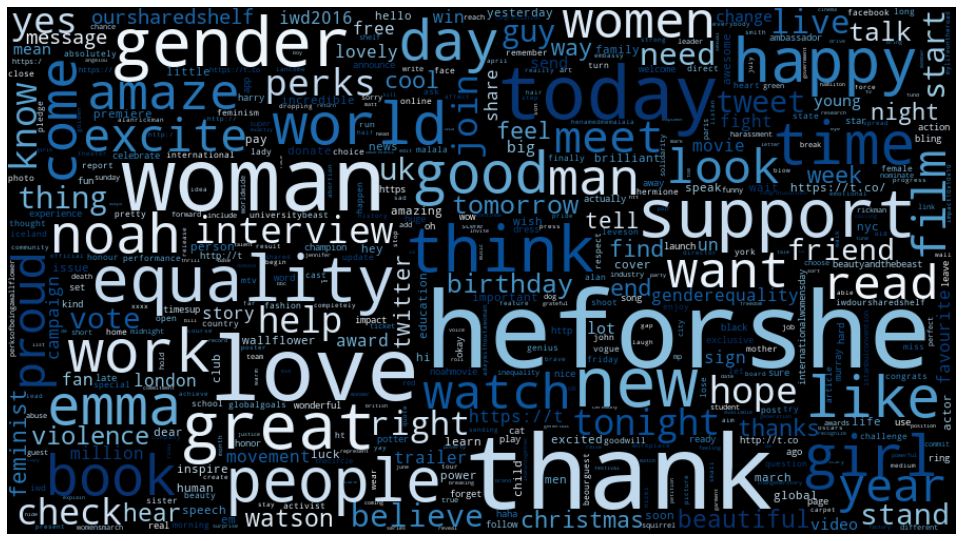

In [1250]:
all_words = []
for line in tweets_user['tokenized']: # try 'tokens'
    all_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [1251]:
#def tokenize_only(text):
 #   tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
  #  filtered_tokens = []
    #filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
   # for token in tokens:
  #      if re.search('[a-zA-Z]', token):
    #        filtered_tokens.append(token)
   # return filtered_tokens

In [1252]:
#totalvocab_stemmed = []
#totalvocab_tokenized = []
#for i in tweets_user['text']:
 #   allwords_stemmed = tokenize_and_stem(i)
  #  totalvocab_stemmed.extend(allwords_stemmed)
    
   # allwords_tokenized = tokenize_only(i)
   # totalvocab_tokenized.extend(allwords_tokenized)

In [1253]:
#vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
#print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

In [1254]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(tokenizer = spacy_tokenizer, min_df=3)

%time tfidf_matrix = tfidf_vectorizer.fit_transform(tweets_user['text'].values)

print(tfidf_matrix.shape)

CPU times: user 647 ms, sys: 3.47 ms, total: 650 ms
Wall time: 650 ms
(1719, 741)


In [1255]:
terms = tfidf_vectorizer.get_feature_names()

In [1256]:
array_matrix = tfidf_matrix.toarray()

In [1257]:
first_vector_tfidfvectorizer=tfidf_matrix[0]
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False).head()

,tfidf
scary,0.634443
birthday,0.526565
happy,0.441583
love,0.353859
able,0.000000


In [1258]:
vocab = tfidf_vectorizer.vocabulary_

In [1259]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
dist

array([[ 0.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  9.12503199e-01,  9.22393104e-01],
       [ 1.00000000e+00,  1.11022302e-16,  9.44124990e-01, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  9.44124990e-01, -2.22044605e-16, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       ...,
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
        -2.22044605e-16,  9.24149663e-01,  7.00005892e-01],
       [ 9.12503199e-01,  1.00000000e+00,  1.00000000e+00, ...,
         9.24149663e-01, -2.22044605e-16,  8.61321579e-01],
       [ 9.22393104e-01,  1.00000000e+00,  1.00000000e+00, ...,
         7.00005892e-01,  8.61321579e-01, -2.22044605e-16]])

In [1260]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import umap

In [1261]:
umap = UMAP(n_components=2, n_neighbors=8)
embedding = umap.fit_transform(dist)

/miniconda3/envs/py366/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 5 separate connected components using meta-embedding (experimental)
  n_components


In [1262]:
umap_df = pd.DataFrame(embedding, columns=[f'emb_{i+1}' for i in range(2)])

In [1263]:
umap_df.head()

,emb_1,emb_2
0,10.101040,-3.237066
1,40.880085,-8.843272
2,61.259445,-12.182627
3,64.059372,-16.038616
4,63.614761,-15.736152


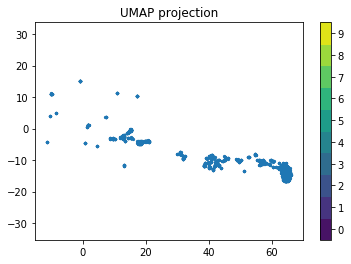

In [1264]:
plt.scatter(umap_df['emb_1'], umap_df['emb_2'], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection', fontsize=12);

In [1265]:
from hdbscan import HDBSCAN
    
hdbscan = HDBSCAN(min_cluster_size=30, gen_min_span_tree=True, metric='braycurtis')

clustering = hdbscan.fit_predict(embedding)

np.unique(clustering)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [1266]:
hdbscan.labels_.max()

9

In [1267]:
labels = hdbscan.labels_
labels

array([ 1,  4,  9, ..., -1, -1,  9])

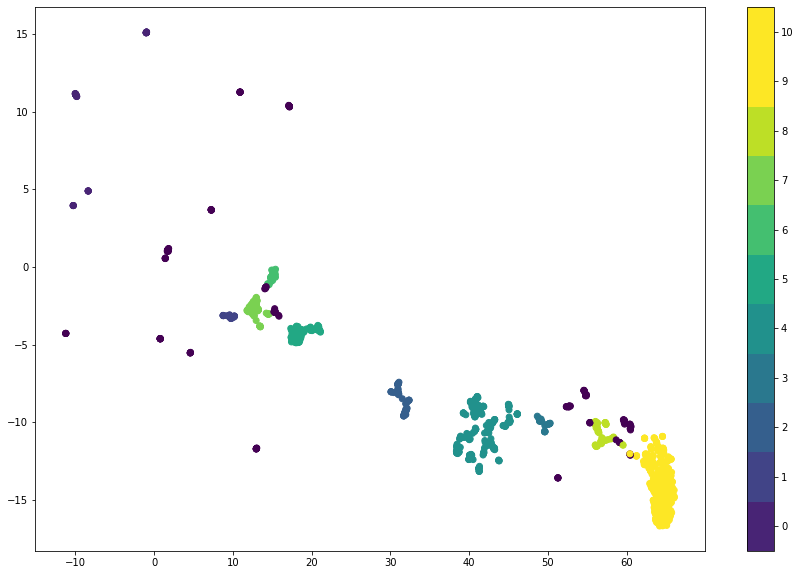

In [1295]:
fig = plt.figure(figsize=(15, 10))
plt.scatter(embedding[:,0], embedding[:,1], c=clustering);
plt.colorbar(boundaries=np.arange(12)-0.5).set_ticks(np.arange(11))

In [1270]:
from sklearn.metrics import silhouette_score

print("Silhouette Coefficient: %0.3f"
      % silhouette_score(embedding, hdbscan.fit_predict(embedding)))

Silhouette Coefficient: 0.568


In [1271]:
from mpl_toolkits.mplot3d import Axes3D

In [1272]:
from sklearn.cluster import KMeans

num_clusters = 9

km = KMeans(n_clusters=num_clusters)

%time km.fit(embedding)

clusters = km.labels_.tolist()

CPU times: user 66.6 ms, sys: 1.5 ms, total: 68.1 ms
Wall time: 67.2 ms


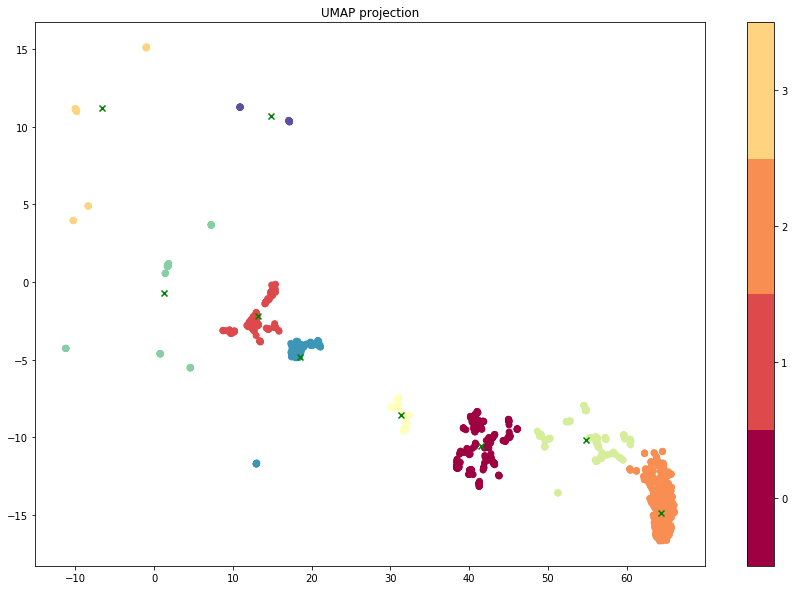

In [1273]:
from matplotlib.pyplot import figure
fig = plt.figure(figsize=(15, 10))
plt.scatter(umap_df['emb_1'], umap_df['emb_2'], c =km.labels_, cmap='Spectral')
#plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(5)-0.5).set_ticks(np.arange(4))
centers = np.array(km.cluster_centers_)

#This array is one dimensional, thus we plot it using:
plt.scatter(centers[:,0], centers[:,1], marker="x", color='green')
plt.title('UMAP projection', fontsize=12);

In [1274]:
from sklearn.metrics import silhouette_score

print("Silhouette Coefficient: %0.3f"
      % silhouette_score(embedding, km.predict(embedding)))

Silhouette Coefficient: 0.697


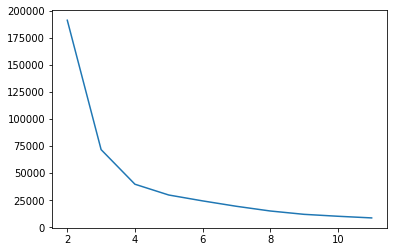

In [1275]:
inertia = []

for n_clusters in range(2, 12):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(embedding)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(2, 12), inertia);

In [1276]:
tweets = {'tweet': tweets_user['text'].values,  'cluster': clusters}
frame = pd.DataFrame(tweets, index = [clusters] , columns = ['tweet', 'cluster'])

In [1277]:
frame[frame['cluster']==1].head()

,tweet,cluster
1,Sexy and scary! 👻 You smashed this. All the lo...,1
1,My dear friend Paris Reid painted this for my ...,1
1,Disgusted by the ugly prejudice and bigotry be...,1
1,Happy 3rd Birthday @OurSharedShelf! Thank you ...,1
1,“I could never love anyone as I love my sister...,1


In [1278]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)
tfidf_df.head()

,able,abortion,absolutely,abuse,account,achieve,action,activist,actor,actress,...,xxxxx,yay,year,yes,yesterday,yoga,york,young,zambia,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.437311,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.378101,0.354037,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1301]:
def get_df_from_cluster(cluster):
    return tfidf_df[clustering==cluster]

In [1303]:
top_words_cluster = get_df_from_cluster(0).T.sum(axis=1).sort_values(ascending=False)
top_words_cluster.head()

yes            19.394466
thank          18.000000
alanrickman     4.465758
awesome         4.095727
absolutely      0.769353
dtype: float64